# Toxic Comment Classification

**Burak Suyunu**

**submitted to Prof. Ethem Alpaydın**

# Aftermath Notebook

In [182]:
import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
import pickle

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

## Learning Curves - Embeddings

In [193]:
methodss = ["GLOVE Pretrained", "GLOVE Train", "No Embedding Train"]
methodnames = ["glove_pretrained", "glove_train", "noembed_train"]
loss = {}
val_loss = {}
for methodname in methodnames:
    file = open("results/build_lstm_"+methodname+".txt", "r")
    res = file.readlines()
    file.close()

    loss[methodname] = eval(res[0])['loss']
    val_loss[methodname] = eval(res[0])['val_loss']

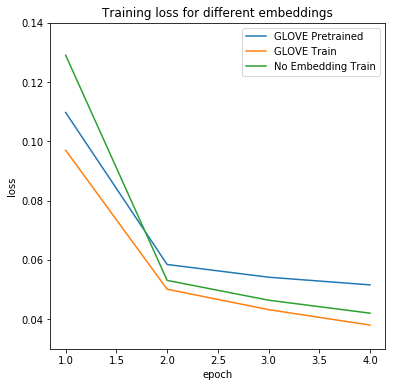

In [194]:
#f, ax = plt.subplots(1)
epochRange = np.arange(1,5,1)
plt.figure(figsize=(6,6))
for methodname in methodnames:
    plt.plot(epochRange,loss[methodname])
plt.title('Training loss for different embeddings')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(methodss, loc='upper right')
plt.ylim(0.03, 0.14)
plt.savefig("imgs/embed_loss.png")
plt.show()

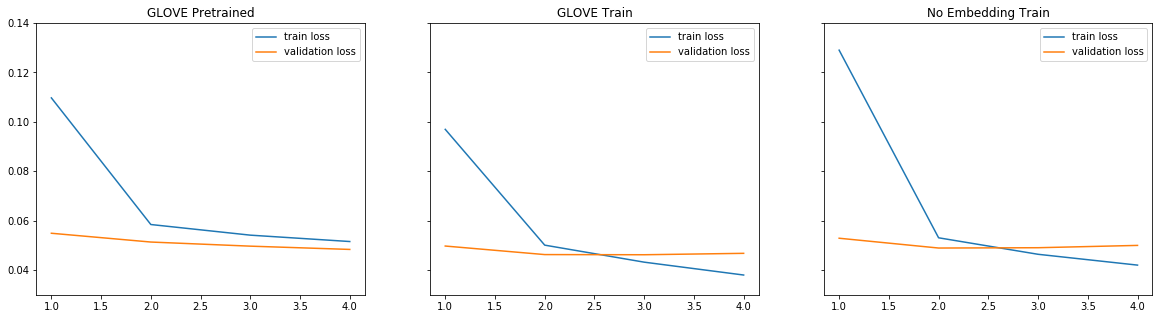

In [195]:
f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(20, 5))

plt.title('Training Vs Validation loss for all embeddings')
ax1.plot(epochRange,loss['glove_pretrained'])
ax1.plot(epochRange,val_loss['glove_pretrained'])
ax1.legend(['train loss', 'validation loss'])
ax1.set_title(methodss[0])
ax1.set_ylim(0.03, 0.14)

ax2.plot(epochRange,loss['glove_train'])
ax2.plot(epochRange,val_loss['glove_train'])
ax2.legend(['train loss', 'validation loss'])
ax2.set_title(methodss[1])
ax2.set_ylim(0.03, 0.14)

ax3.plot(epochRange,loss['noembed_train'])
ax3.plot(epochRange,val_loss['noembed_train'])
ax3.legend(['train loss', 'validation loss'])
ax3.set_title(methodss[2])
ax3.set_ylim(0.03, 0.14)

plt.savefig("imgs/embed_learn.png")
plt.show()

## Learning Curves - Models

In [196]:
modelss = ['LSTM', "Bi LSTM", "Bi GRU", "Bi GRU CNN"]
modelnames = ["lstm", "bi_lstm", "bi_gru", "bi_gru_cnn"]
loss = {}
val_loss = {}
for modelname in modelnames:
    file = open("results/"+modelname+"_gt_runs.txt", "r")
    res = file.readlines()
    file.close()

    loss[modelname] = eval(res[0])['loss']
    val_loss[modelname] = eval(res[0])['val_loss']

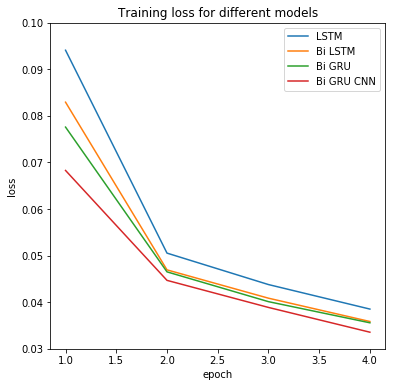

In [197]:
#f, ax = plt.subplots(1)
epochRange = np.arange(1,5,1)
plt.figure(figsize=(6,6))
for modelname in modelnames:
    plt.plot(epochRange,loss[modelname])
plt.title('Training loss for different models')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(modelss, loc='upper right')
plt.ylim(0.03, 0.10)
plt.savefig("imgs/model_loss.png")
plt.show()

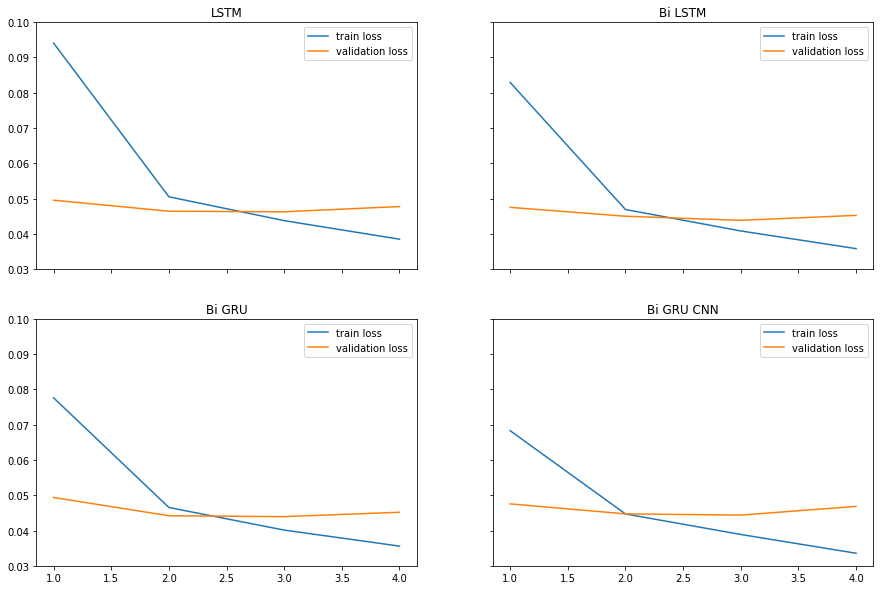

In [198]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15, 10))

plt.title('Training Vs Validation loss for all models')
ax1.plot(epochRange,loss[modelnames[0]])
ax1.plot(epochRange,val_loss[modelnames[0]])
ax1.legend(['train loss', 'validation loss'])
ax1.set_title(modelss[0])
ax1.set_ylim(0.03, 0.10)

ax2.plot(epochRange,loss[modelnames[1]])
ax2.plot(epochRange,val_loss[modelnames[1]])
ax2.legend(['train loss', 'validation loss'])
ax2.set_title(modelss[1])
ax2.set_ylim(0.03, 0.10)

ax3.plot(epochRange,loss[modelnames[2]])
ax3.plot(epochRange,val_loss[modelnames[2]])
ax3.legend(['train loss', 'validation loss'])
ax3.set_title(modelss[2])
ax3.set_ylim(0.03, 0.10)

ax4.plot(epochRange,loss[modelnames[3]])
ax4.plot(epochRange,val_loss[modelnames[3]])
ax4.legend(['train loss', 'validation loss'])
ax4.set_title(modelss[3])
ax4.set_ylim(0.03, 0.10)

plt.savefig("imgs/model_train.png")
plt.show()

## Paired Statistical t-test on ROC-AUC scores (4-fold cross validation)

In [28]:
modelnames = ["lstm", "bi_lstm", "bi_gru", "bi_gru_cnn"]
roc_auc = {}
val_loss = {}
for modelname in modelnames:
    file = open("results/"+modelname+"_gt_kfold.txt", "r")
    res = file.readlines()
    file.close()

    roc_auc[modelname] = eval(res[0])['roc_auc']
    val_loss[modelname] = eval(res[0])['val_loss']

In [180]:
N = 4

print("Paired t-test with %95 cconfidence interval for 4-fold cross validation")
print("stats.t.ppf(1-0.025, 4-1) = ", stats.t.ppf(1-0.025, N-1))
print()

for i in range(N):
    for j in range(i+1, N):
        a = roc_auc[modelnames[j]]
        b = roc_auc[modelnames[i]]
        
        print(modelss[j] + " - " + modelss[i])
        
        t2, p2 = stats.ttest_ind(a,b,equal_var=False)
        print("t = " + str(t2))
        print("p = " + str(2*p2))

        # https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
        # 
        # If we observe a large p-value, for example larger than 0.05 or 0.1,
        # then we cannot reject the null hypothesis of identical average scores.
        # If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
        # then we reject the null hypothesis of equal averages.

        if t2 < -stats.t.ppf(1-0.025, N-1) or t2 > stats.t.ppf(1-0.025, N-1):
            print("REJECT")
        else:
            print("NO REJECT")
            
        print()

Paired t-test with %95 cconfidence interval for 4-fold cross validation
stats.t.ppf(1-0.025, 4-1) =  3.182446305284263

Bi LSTM - LSTM
t = 1.4657779049490922
p = 0.5617260724389667
NO REJECT

Bi GRU - LSTM
t = 1.656231730061263
p = 0.47938204112569
NO REJECT

Bi GRU CNN - LSTM
t = 2.9868754943081215
p = 0.23580438543504786
NO REJECT

Bi GRU - Bi LSTM
t = 0.27185757589232806
p = 1.6229307746804054
NO REJECT

Bi GRU CNN - Bi LSTM
t = 1.348069379546982
p = 0.6516724745201635
NO REJECT

Bi GRU CNN - Bi GRU
t = 0.9388714692156627
p = 0.92928171823658
NO REJECT



## Ensemble

In [53]:
test_labels = pd.read_csv("data/test_labels.csv")
test_labels = test_labels[test_labels.toxic > -1]
test_labels = test_labels.reset_index(drop=True)
y_test = test_labels[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [81]:
lstm_pred = pickle.load( open( "predictions/lstm_pred.p", "rb" ) )
bi_lstm_pred = pickle.load( open( "predictions/bi_lstm_pred.p", "rb" ) )
bi_gru_pred = pickle.load( open( "predictions/bi_gru_pred.p", "rb" ) )
bi_gru_cnn_pred = pickle.load( open( "predictions/bi_gru_cnn_pred.p", "rb" ) )
logistic_pred = pickle.load( open( "predictions/logistic_pred.p", "rb" ) )

In [181]:
for i, label in enumerate(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]):
    print(label)
    print(np.corrcoef([logistic_pred[:,i], lstm_pred[:,i], bi_lstm_pred[:,i], bi_gru_pred[:,i], bi_gru_cnn_pred[:,i]]))
    print()

toxic
[[1.         0.91563523 0.9263267  0.92952259 0.93222133]
 [0.91563523 1.         0.96900975 0.9658573  0.94751703]
 [0.9263267  0.96900975 1.         0.97966973 0.96457748]
 [0.92952259 0.9658573  0.97966973 1.         0.97339618]
 [0.93222133 0.94751703 0.96457748 0.97339618 1.        ]]

severe_toxic
[[1.         0.73582253 0.77781278 0.78003755 0.78937223]
 [0.73582253 1.         0.96393308 0.93799692 0.91050277]
 [0.77781278 0.96393308 1.         0.94578433 0.93830535]
 [0.78003755 0.93799692 0.94578433 1.         0.93688723]
 [0.78937223 0.91050277 0.93830535 0.93688723 1.        ]]

obscene
[[1.         0.90857744 0.9148113  0.92071786 0.92605198]
 [0.90857744 1.         0.97935235 0.97183951 0.96340727]
 [0.9148113  0.97935235 1.         0.97945032 0.97149593]
 [0.92071786 0.97183951 0.97945032 1.         0.98330963]
 [0.92605198 0.96340727 0.97149593 0.98330963 1.        ]]

threat
[[1.         0.50622236 0.58686866 0.66901288 0.73050432]
 [0.50622236 1.         0.865874

In [145]:
new_pred = logistic_pred*0.3 + lstm_pred*0.1 + bi_lstm_pred*0.1 + bi_gru_pred*0.1 + bi_gru_cnn_pred*0.4

In [ ]:
roc_auc_score(y_test, new_pred)